In [72]:
import acquire
import prepare
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from math import sqrt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Acquiring and Preparing zillow data
    

In [73]:
df = acquire.get_zillow_data()

Using cached csv


In [74]:
#checking shape to make sure I have the appropriate amount 
df.shape

(52441, 7)

In [75]:
# checking for null amounts
df.isnull().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
lotsizesquarefeet               369
taxvaluedollarcnt                 1
yearbuilt                       116
fips                              0
dtype: int64

In [76]:
# Looking at data types

df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
lotsizesquarefeet               float64
taxvaluedollarcnt               float64
yearbuilt                       float64
fips                            float64
dtype: object

In [77]:
#general overview of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,52441.0,3.300681,0.949094,0.0,3.0,3.0,4.00,14.0
bathroomcnt,52441.0,2.299403,1.022772,0.0,2.0,2.0,3.00,18.0
calculatedfinishedsquarefeet,52359.0,1922.890754,1004.365838,128.0,1268.0,1659.0,2306.00,21929.0
lotsizesquarefeet,52072.0,11339.624078,86747.634061,236.0,5583.0,6840.5,8798.25,6971010.0
taxvaluedollarcnt,52440.0,529688.163921,751894.553363,1000.0,193747.5,373612.0,619301.25,49061236.0
yearbuilt,52325.0,1963.393884,23.133571,1878.0,1950.0,1961.0,1979.00,2016.0
fips,52441.0,6049.132149,21.029067,6037.0,6037.0,6037.0,6059.00,6111.0


## Takeaway
    - 52k rows
    - tax values range from 1_000 to 49_061_236
    - average tax value is 529_688
    - min numbers like 0 and max numbers like 14/18 bedroom/bathroom 
    - other outliers within columns
    - messy columns names
    - missing values

In [78]:
# drop all null values from df 
df = df.dropna()

In [79]:
# clean all values and replace any missing

df= df.replace(r'^\s*$', np.nan, regex = True)

In [80]:
# check how many rows were lost when dropping null values
df.shape

(51959, 7)

In [81]:
# user friendly column names

df = df.rename( columns = {'bedroomcnt': 'bedroom',
                           'bathroomcnt': 'bathroom',
                           'calculatedfinishedsquarefeet':'square_ft',
                           'lotsizesquarefeet': 'lot_size',
                           'taxvaluedollarcnt': 'tax_value',
                           'yearbuilt': 'year_built'
                          })

In [82]:
df.columns.tolist()

['bedroom',
 'bathroom',
 'square_ft',
 'lot_size',
 'tax_value',
 'year_built',
 'fips']

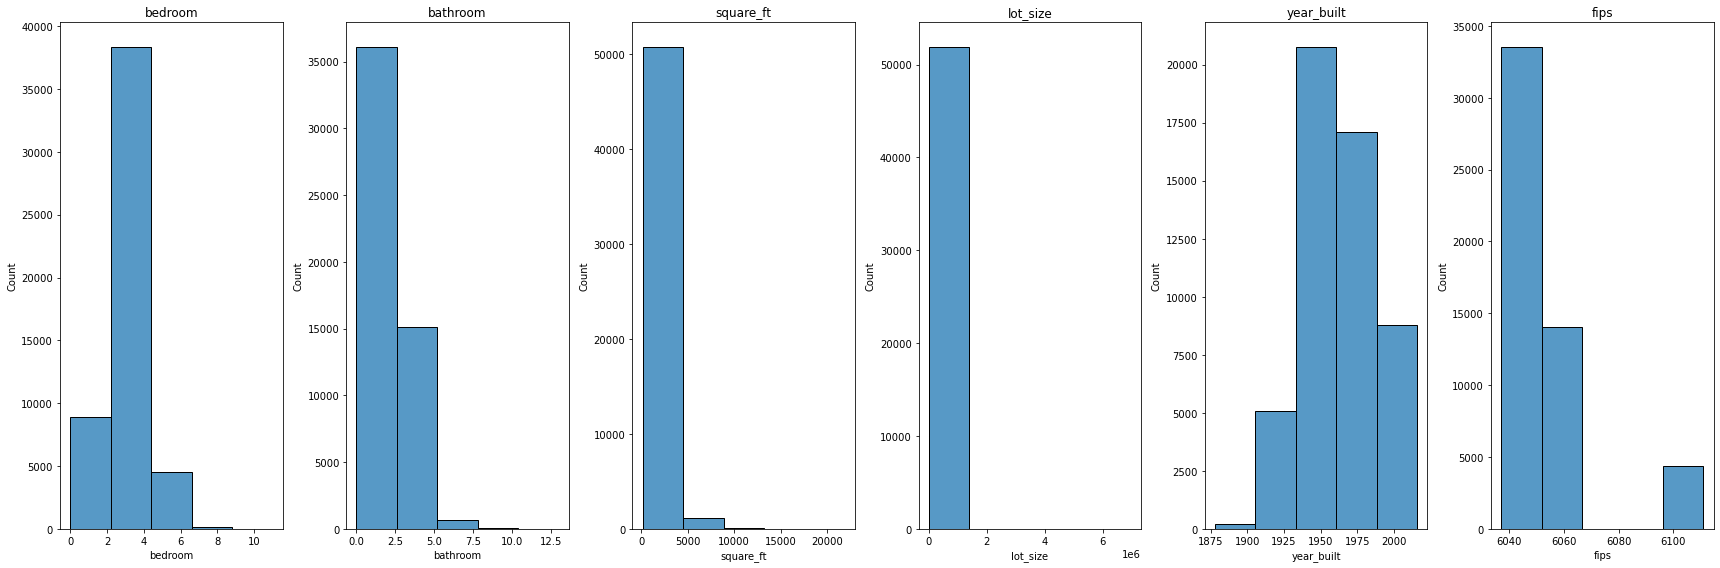

In [90]:
# Visualize Histograms

# list of numeric columns for histograms
cols = [col for col in df.columns if col not in ['tax_value']]

# figsize width to height
plt.figure(figsize=(24, 8))

# loop to iterate over columns
for i, col in enumerate(cols):
        
        # i starts at 0 but plot numbers should start at 1
        plot_number = i + 1
        
        # create subplot
        plt.subplot(1, len(cols), plot_number)
        
        # create title with the column name
        plt.title(col)
        
        # display a histogram for each of the columns            
        sns.histplot(df[col], bins=5)
        
        # Hide gridlines.
        plt.grid(False)
         
        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)
    
plt.tight_layout()
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/an

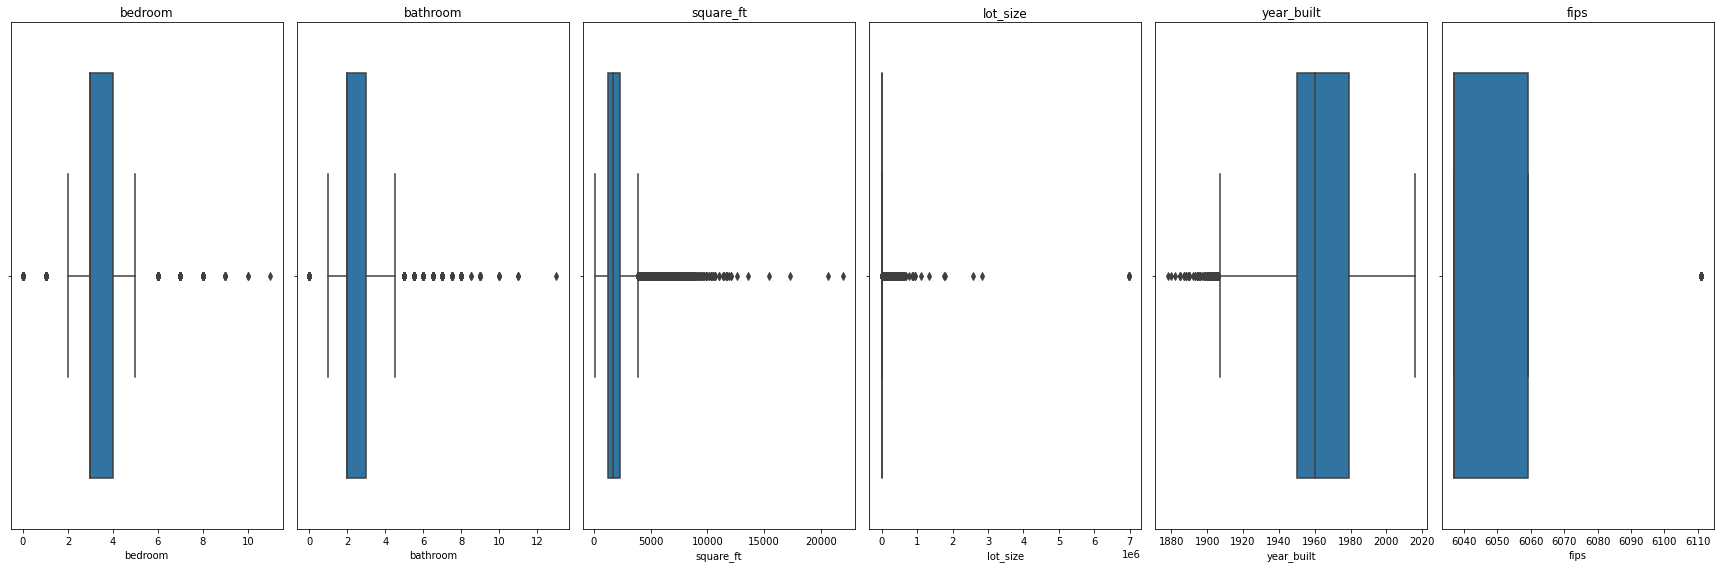

In [92]:
# Visualize Boxplots


# list of numeric columns
cols = [col for col in df.columns if col not in ['tax_value']]

# figsize width to height
plt.figure(figsize=(24, 8))

# loop to iterate over columns
for i, col in enumerate(cols):
        
        # i starts at 0 but plot numbers should start at 1
        plot_number = i + 1
        
        # create subplot
        plt.subplot(1, len(cols), plot_number)
        
        # create title with the column name
        plt.title(col)
        
        # display a boxplot for each of the columns            
        sns.boxplot(df[col])
        
        # Hide gridlines.
        plt.grid(False)
         
      
    
plt.tight_layout()
plt.show()

## Takeaway
    - scaling needed, histogram and boxplot not useful
    - data cannot give meaningful visualizations because of outliers
    - fips might work better with different dtypes 

In [14]:
# create an age column
df['age'] = 2017 - df.year_built
df.head(3)

,bedroom,bathroom,square_ft,lot_size,tax_value,year_built,fips,age
0,4.0,3.5,3100.0,4506.0,1023282.0,1998.0,6059.0,19.0
1,2.0,1.0,1465.0,12647.0,464000.0,1967.0,6111.0,50.0
2,3.0,2.0,1243.0,8432.0,564778.0,1962.0,6059.0,55.0


In [15]:
# Create list of datatypes I want to change
int_col_list = ['bedroom', 'bathroom', 'square_ft', 'lot_size', 'year_built','tax_value', 'age']
obj_col_list = ['fips']
    
# Change data types where it makes sense
for col in df:
    if col in int_col_list:
        df[col] = df[col].astype(int)
    if col in obj_col_list:
        df[col] = df[col].astype(int).astype(object)

In [16]:
# check the values

df.fips.value_counts()

6037    33567
6059    14034
6111     4358
Name: fips, dtype: int64

In [17]:
# replacing county values with more descriptive values

df.fips = df.fips.replace({6037: 'los_angeles', 6059: 'orange', 6111: 'ventura'})

In [18]:
df.fips.value_counts()

los_angeles    33567
orange         14034
ventura         4358
Name: fips, dtype: int64

In [19]:
# recheck the types

df.dtypes

bedroom        int64
bathroom       int64
square_ft      int64
lot_size       int64
tax_value      int64
year_built     int64
fips          object
age            int64
dtype: object

In [20]:
df.head()

,bedroom,bathroom,square_ft,lot_size,tax_value,year_built,fips,age
0,4,3,3100,4506,1023282,1998,orange,19
1,2,1,1465,12647,464000,1967,ventura,50
2,3,2,1243,8432,564778,1962,orange,55
3,4,3,2376,13038,145143,1970,los_angeles,47
4,4,3,2962,63000,773303,1950,los_angeles,67


In [21]:
#check dtypes and make adjustments in my wrangle.py notebook
df.dtypes

bedroom        int64
bathroom       int64
square_ft      int64
lot_size       int64
tax_value      int64
year_built     int64
fips          object
age            int64
dtype: object

In [22]:
# creat dummy columns for fips so it will be easier to evaluate later

dummy_df = pd.get_dummies(df['fips'])
df = pd.concat([df, dummy_df], axis = 1)

In [23]:
# look at df witih dummy columns added
df.head()

,bedroom,bathroom,square_ft,lot_size,tax_value,year_built,fips,age,los_angeles,orange,ventura
0,4,3,3100,4506,1023282,1998,orange,19,0,1,0
1,2,1,1465,12647,464000,1967,ventura,50,0,0,1
2,3,2,1243,8432,564778,1962,orange,55,0,1,0
3,4,3,2376,13038,145143,1970,los_angeles,47,1,0,0
4,4,3,2962,63000,773303,1950,los_angeles,67,1,0,0


df = df.drop(columns = ['year_built'])

In [24]:
# general overview after some changes have been made

df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,51959.0,3.304952,0.934239,0.0,3.0,3.0,4.0,11.0
bathroom,51959.0,2.233222,0.989084,0.0,2.0,2.0,3.0,13.0
square_ft,51959.0,1918.251506,994.308287,128.0,1268.0,1657.0,2301.0,21929.0
lot_size,51959.0,11251.588830,86640.635731,236.0,5581.5,6838.0,8777.0,6971010.0
tax_value,51959.0,525552.311842,716442.460110,1000.0,193482.5,372791.0,616741.5,25381250.0
year_built,51959.0,1963.247849,22.976170,1878.0,1950.0,1960.0,1979.0,2016.0
age,51959.0,53.752151,22.976170,1.0,38.0,57.0,67.0,139.0
los_angeles,51959.0,0.646029,0.478205,0.0,0.0,1.0,1.0,1.0
orange,51959.0,0.270098,0.444014,0.0,0.0,0.0,1.0,1.0
ventura,51959.0,0.083874,0.277201,0.0,0.0,0.0,0.0,1.0


In [25]:
# addressing the outliers in the dataset

def remove_outliers(df, k, col_list):
    ''' this function take in a dataframe, k value, and specified columns 
    within a dataframe and then return the dataframe with outliers removed
    '''
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [26]:
df = remove_outliers(df, 3.0, ['bedroom', 'bathroom', 'square_ft','lot_size', 'tax_value', 'age', 'year_built'])

In [27]:
# re-checking my dataframe and seeing outliers removed

df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,46857.0,3.241650,0.869577,1.0,3.0,3.0,4.0,6.0
bathroom,46857.0,2.103997,0.808444,0.0,2.0,2.0,3.0,5.0
square_ft,46857.0,1764.695883,723.879816,152.0,1242.0,1593.0,2130.0,5288.0
lot_size,46857.0,7013.844826,2735.086760,236.0,5450.0,6615.0,8003.0,17787.0
tax_value,46857.0,416710.415221,314126.220167,3254.0,183437.0,352080.0,559188.0,1751776.0
year_built,46857.0,1962.249952,22.576541,1878.0,1950.0,1959.0,1977.0,2016.0
age,46857.0,54.750048,22.576541,1.0,40.0,58.0,67.0,139.0
los_angeles,46857.0,0.640438,0.479877,0.0,0.0,1.0,1.0,1.0
orange,46857.0,0.277973,0.448005,0.0,0.0,0.0,1.0,1.0
ventura,46857.0,0.081589,0.273740,0.0,0.0,0.0,0.0,1.0


In [93]:
# Check how many rows dropped after cleaning

df.shape

(51959, 7)

### Takeaways
- 46_857 rows left. 7K dropped
    - MEAN home value 416_710  
    - MAX  home value 1_751_776 
- null values dropped
- outliers removed
- columns renamed
- data types adjusted
- fips columns converted to 'county' column

# Exploration

In [29]:
train, validate, test,train_scaled, validate_scaled, test_scaled = prepare.wrangle_zillow()

Using cached csv


In [30]:
train.shape, validate.shape, test.shape

((26239, 11), (11246, 11), (9372, 11))

df2.describe().T

### Takeaways
- There were some outliers that made initial visualizations difficult. 
- Outliers needed to be removed.

## Exploration
    - What drives property tax values


In [31]:
train, validate, test = prepare.wrangle_zillow()

Using cached csv


ValueError: too many values to unpack (expected 3)

In [ ]:
train.shape, validate.shape, test.shape

In [ ]:
train.isnull().sum()

In [ ]:
train.dtypes

In [ ]:
train.describe().T

In [ ]:
train.head()

In [32]:
# create a function that takes in a dataframe

continuous_cols = ['bedroom', 'bathroom', 'square_ft', 'lot_size', 'age']


def plot_variable_pairs(df):
    # plot the columns in a pairplot
    sns.pairplot(df, kind = 'reg', corner = True, plot_kws={'line_kws':{'color':'orange'}})
    plt.show()

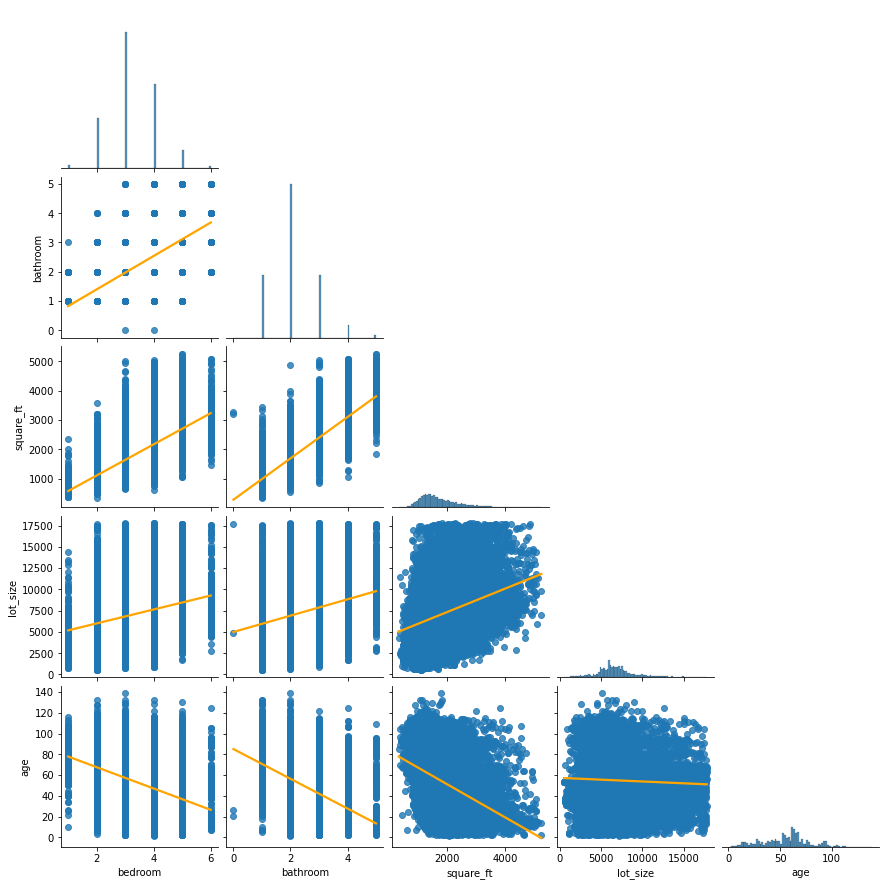

In [33]:
# call function to visualize continuous columns in the train dataset
plot_variable_pairs(train[continuous_cols])

In [34]:
# Heatmap to visualize correlations in data

df_corr = train.corr().reset_index()
corr_matrix = train.corr().sort_values(by = 'tax_value', ascending=False)
corr_matrix["tax_value"].reset_index().style.background_gradient('gist_earth', vmin = -1, vmax = 1)

,index,tax_value
0,tax_value,1.000000
1,square_ft,0.531314
2,bathroom,0.431084
3,bedroom,0.246607
4,year_built,0.237724
5,orange,0.170452
6,lot_size,0.129537
7,ventura,0.025680
8,los_angeles,-0.173619
9,age,-0.237724


## **Questions**
#### - Does county affect tax value?
#### - Does square footage have an affect on tax value?
#### - Does bedroom or bathroom count have an affect on tax value?
#### - Does the age of the house affect tax value?

### Question 1:
        - exploring county and tax_values

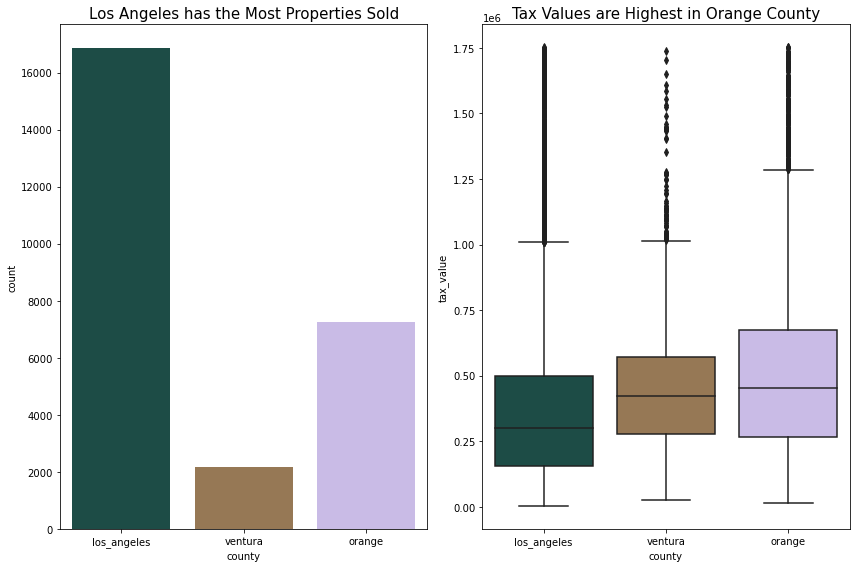

In [35]:

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.countplot(x='county', palette='cubehelix', data=train)
plt.title('Los Angeles has the Most Properties Sold', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(x='county', y='tax_value', data=train , palette='cubehelix')
plt.title('Tax Values are Highest in Orange County', fontsize=15)

plt.tight_layout()

In [36]:
# look at ttest for orange county
# spearmanr for county

### Question 2 
        - exploring square_ft and tax_value

<Figure size 720x576 with 0 Axes>

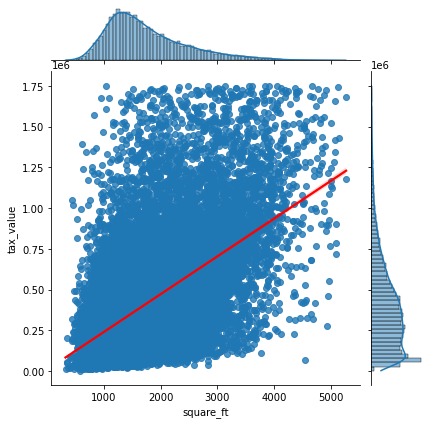

In [37]:
# jointplot for 
plt.figure(figsize=(10,8))
sns.jointplot(x= 'square_ft',y= 'tax_value', data=train, kind = 'reg', line_kws = {'color' :'red'})
plt.show()

### Hypothesis testing with Pearson's r

    Null Hypothesis : There is no linear relationship between square_ft and property tax value

    Alternative Hypothesis: There is a linear relationship between square_ft and tax value

In [38]:
alpha = .05
r, p_value = stats.pearsonr(train.square_ft, train.tax_value)
r, p_value

if p_value > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')
print(f'p-value: {round(p_value,3)}')

We reject the null hypothesis
p-value: 0.0


### Question 3:
        - explore bedroom and tax_value

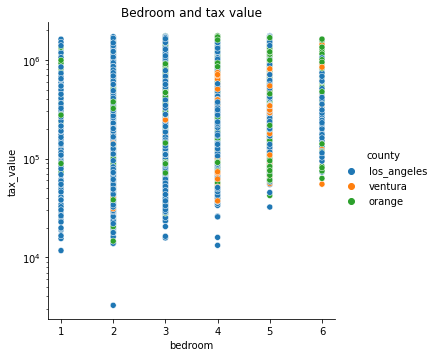

In [39]:
# Visualize number of bedrooms and their relationship with tax value

ax = sns.relplot(x='bedroom', y='tax_value', data=train, kind='scatter', hue='county')
ax.set(yscale='log')
plt.title('Bedroom and tax value')
plt.show()

### Hypothesis testing with Pearson's r

    Null Hypothesis : There is no linear relationship between number of bedrooms and property tax value

    Alternative Hypothesis: There is a linear relationship between number of bedrooms and tax value

In [40]:
# statistical analysis to of visual above

alpha = 0.05

r, p_value = pearsonr(train.bedroom, train.tax_value)

if p_value > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')
print(f'p-value: {round(p_value,3)}')

We reject the null hypothesis
p-value: 0.0


### Question 4
        - Explore bathroom and tax_value

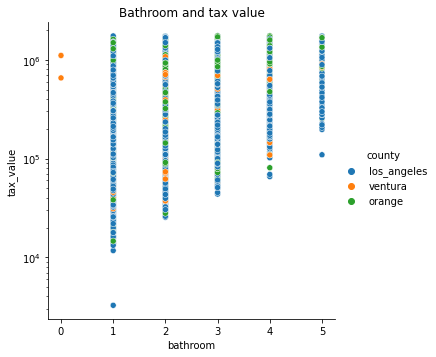

In [41]:
#visualize bathroom and tax value

ax2 = sns.relplot(x='bathroom', y='tax_value', data=train, kind='scatter', hue='county')
ax2.set(yscale='log')
plt.title('Bathroom and tax value')
plt.show()

### Hypothesis testing with Pearson's r

    Null Hypothesis : There is no linear relationship between number of bathrooms and property tax value

    Alternative Hypothesis: There is a linear relationship between number of bathrooms and tax value

In [42]:
alpha = 0.05

r, p_value = pearsonr(train.bathroom, train.tax_value)

if p_value > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')
print(f'p-value: {round(p_value,3)}')

We reject the null hypothesis
p-value: 0.0


# Modeling
    - Data needs to be scaled for modeling

In [43]:
# columns need scaling

def scale_data(train, validate, test, return_scaler=False):
    '''
    Scales the 3 data splits.
    
    takes in the train, validate, and test data splits and returns their scaled counterparts.
    
    If return_scaler is true, the scaler object will be returned as well.
    '''
    columns_to_scale = ['bedroom', 'bathroom', 'square_ft', 'lot_size', 'age']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    validate_scaled[columns_to_scale] = scaler.transform(validate[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [44]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((26239, 11), (11246, 11), (9372, 11))

In [45]:
train_scaled.head()

,bedroom,bathroom,square_ft,lot_size,tax_value,year_built,county,age,los_angeles,orange,ventura
8719,0.0,0.2,0.045777,0.387299,199718,1939.0,los_angeles,0.557971,1,0,0
44117,0.8,0.6,0.543042,0.539328,1664248,1969.0,los_angeles,0.340580,1,0,0
49765,0.6,0.4,0.174600,0.340338,376933,1955.0,los_angeles,0.442029,1,0,0
9295,0.4,0.6,0.601377,0.228653,783504,1992.0,los_angeles,0.173913,1,0,0
23287,0.4,0.4,0.268179,0.374993,180180,1972.0,ventura,0.318841,0,0,1


In [46]:
# set my X_train and y_train variables based on the scaled/not scaled data
X_train = train_scaled.drop(columns = ['tax_value', 'county','los_angeles', 'orange', 'ventura'])
y_train = pd.DataFrame(train.tax_value)

X_validate = validate_scaled.drop(columns = ['tax_value', 'county','los_angeles', 'orange', 'ventura'])
y_validate = pd.DataFrame(validate.tax_value)

X_test = test_scaled.drop(columns = ['tax_value', 'county','los_angeles', 'orange', 'ventura'])
y_test= pd.DataFrame(test.tax_value)

In [47]:
y_train.head()

,tax_value
8719,199718
44117,1664248
49765,376933
9295,783504
23287,180180


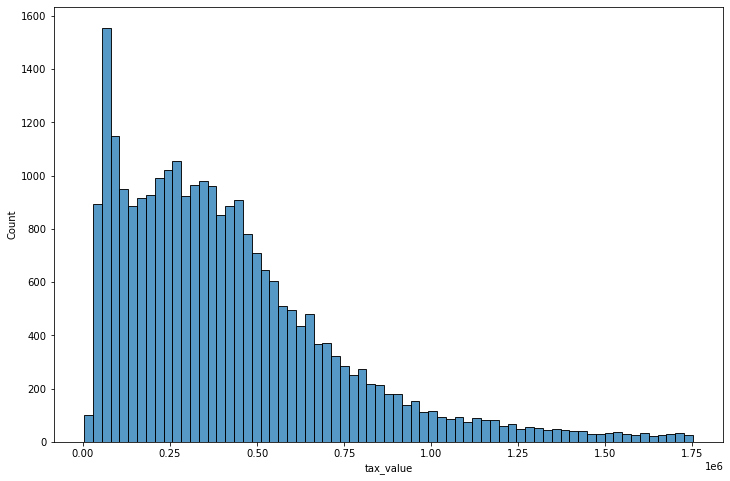

In [48]:
plt.figure(figsize=(12,8))
sns.histplot(y_train.tax_value)
plt.show()

In [49]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=3)

# fit the data using RFE
rfe.fit(X_train , y_train)  

feature_mask = rfe.support_

rfe_feature = X_train.iloc[:, feature_mask].columns.tolist()

rfe_feature

['bedroom', 'bathroom', 'square_ft']

## **Baseline**

In [103]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict tax value_pred_mean
tax_value_pred_mean = y_train['tax_value'].mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

# 2. compute tax value_pred_median
tax_value_pred_median = y_train['tax_value'].median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

# 3. RMSE of tax_value_pred_mean
mean_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
mean_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(mean_rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(mean_rmse_validate, 2))

# 4. RMSE of tax_value_pred_median
median_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
median_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

print("\nRMSE using Median\nTrain/In-Sample: ", round(median_rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(median_rmse_validate, 2))


RMSE using Mean
Train/In-Sample:  316189.34 
Validate/Out-of-Sample:  310611.92

RMSE using Median
Train/In-Sample:  322894.86 
Validate/Out-of-Sample:  316684.9


### **Linear Regression (OLS)**

In [51]:
X_train.head()

,bedroom,bathroom,square_ft,lot_size,year_built,age
8719,0.0,0.2,0.045777,0.387299,1939.0,0.557971
44117,0.8,0.6,0.543042,0.539328,1969.0,0.340580
49765,0.6,0.4,0.174600,0.340338,1955.0,0.442029
9295,0.4,0.6,0.601377,0.228653,1992.0,0.173913
23287,0.4,0.4,0.268179,0.374993,1972.0,0.318841


In [52]:
# create the Linear Regression model object
lm = LinearRegression(normalize=True)

# fit the model to training data and specify column in y_train  
lm.fit(X_train[['bedroom', 'bathroom', 'square_ft']], y_train.tax_value)

# predict train & validate
y_train['tax_value_pred_lm'] = lm.predict(X_train[['bedroom', 'bathroom', 'square_ft']])
y_validate['tax_value_pred_lm'] = lm.predict(X_validate[['bedroom', 'bathroom', 'square_ft']])

# evaluate rmse for train & validate
lm_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)
lm_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\n\nTraining/In-Sample: ", lm_rmse_train, 
      "\nValidation/Out-of-Sample: ", lm_rmse_validate)

RMSE for OLS using LinearRegression

Training/In-Sample:  264774.55204458995 
Validation/Out-of-Sample:  260623.08921811197


### **LassoLars**

In [53]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train[['bedroom', 'bathroom', 'square_ft']], y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train[['bedroom', 'bathroom', 'square_ft']])

# evaluate: rmse
ll_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate[['bedroom', 'bathroom', 'square_ft']])

# evaluate: rmse
ll_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\n\nTraining/In-Sample: ", ll_rmse_train, 
      "\nValidation/Out-of-Sample: ", ll_rmse_validate)


RMSE for Lasso + Lars

Training/In-Sample:  264774.86104820983 
Validation/Out-of-Sample:  260622.0580661037


### **TweedieRegressor (GLM)**

In [54]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train[['bedroom', 'bathroom', 'square_ft']], y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train[['bedroom', 'bathroom', 'square_ft']])

# evaluate: rmse
glm_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate[['bedroom', 'bathroom', 'square_ft']])

# evaluate: rmse
glm_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\n\nTraining/In-Sample: ", glm_rmse_train, 
      "\nValidation/Out-of-Sample: ", glm_rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0

Training/In-Sample:  266002.1284754488 
Validation/Out-of-Sample:  263597.8527783972


### **PolynomialFeatures**

In [109]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train[['bedroom', 'bathroom', 'square_ft']])

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate[['bedroom', 'bathroom', 'square_ft']])
X_test_degree3 = pf.transform(X_test[['bedroom', 'bathroom', 'square_ft']])


In [110]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree3, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree3)

# evaluate: rmse
pf_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree3)

# evaluate: rmse
pf_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=3\n\nTraining/In-Sample: ", pf_rmse_train, 
      "\nValidation/Out-of-Sample: ", pf_rmse_validate)


RMSE for Polynomial Model, degrees=3

Training/In-Sample:  263309.67984015786 
Validation/Out-of-Sample:  259992.74477652117


## **Evaluate**
#### **Plotting Actual vs. Predicted Values**

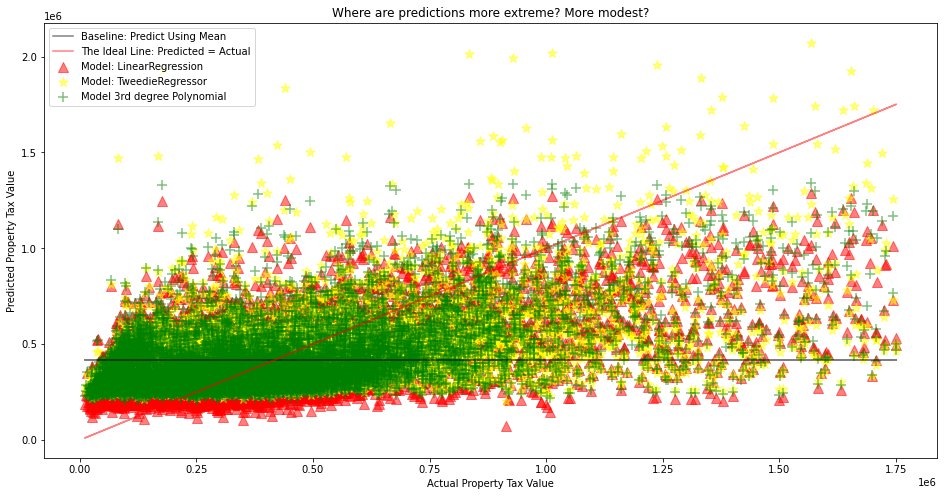

In [98]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.tax_value_pred_mean, alpha=.5, color="black", label='Baseline: Predict Using Mean')
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="red", label='The Ideal Line: Predicted = Actual')


plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm, 
            alpha=.5, marker = '^', color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm, 
            alpha=.5, marker = '*', color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2, 
            alpha=.5, marker = '+', color="green", s=100, label="Model 3rd degree Polynomial")
plt.legend()
plt.xlabel("Actual Property Tax Value")
plt.ylabel("Predicted Property Tax Value")
plt.title("Where are predictions more extreme? More modest?")
plt.show()


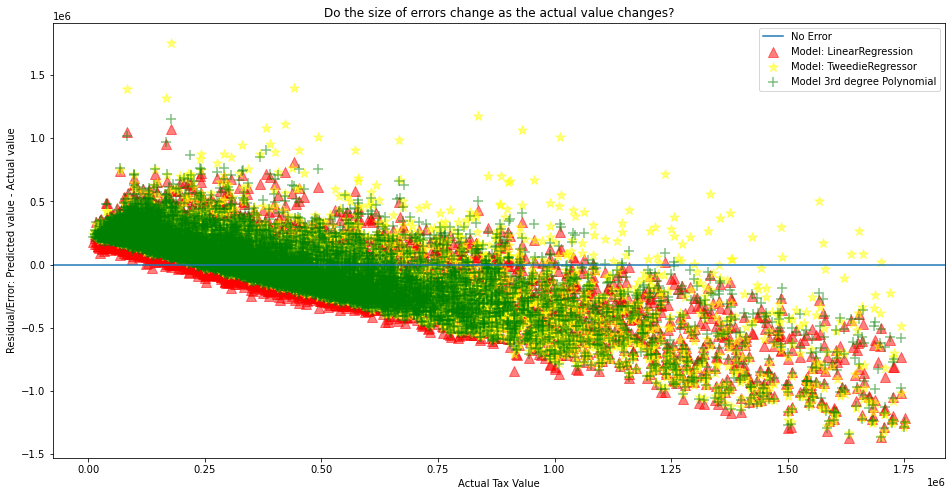

In [100]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm-y_validate.tax_value, 
            alpha=.5, marker = '^', color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm-y_validate.tax_value, 
            alpha=.5, marker = '*', color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm2-y_validate.tax_value, 
            alpha=.5, marker = '+', color="green", s=100, label="Model 3rd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted value - Actual value")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()


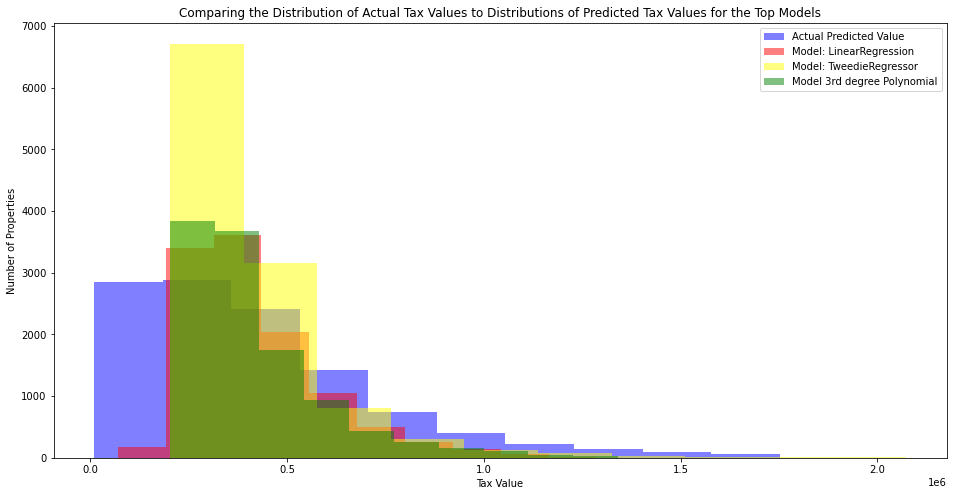

In [101]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual Predicted Value")
plt.hist(y_validate.tax_value_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tax_value_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.tax_value_pred_lm2, color='green', alpha=.5, label="Model 3rd degree Polynomial")
plt.xlabel("Tax Value")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Tax Values to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()


In [104]:
metric_df = pd.DataFrame(data = [{'Model': 'Baseline', 'Train Baseline': mean_rmse_train, 'Validate Baseline':mean_rmse_validate, 
                          }])

In [105]:
metric_df = metric_df.append({'Model': 'Linear Regression', 'Train Baseline': lm_rmse_train , 'Validate Baseline':lm_rmse_validate, 
                          }, ignore_index = True)
metric_df = metric_df.append({'Model': 'LassoLars', 'Train Baseline': ll_rmse_train , 'Validate Baseline':ll_rmse_validate, 
                          }, ignore_index = True)
metric_df = metric_df.append({'Model': 'TweedieRegressor (GLM)', 'Train Baseline': glm_rmse_train , 'Validate Baseline':glm_rmse_validate, 
                          }, ignore_index = True)
metric_df = metric_df.append({'Model': 'PolynomialFeatures', 'Train Baseline': pf_rmse_train , 'Validate Baseline':pf_rmse_validate, 
                          }, ignore_index = True)

In [106]:
metric_df

,Model,Train Baseline,Validate Baseline
0,Baseline,316189.343454,310611.924741
1,Linear Regression,264774.552045,260623.089218
2,LassoLars,264774.861048,260622.058066
3,TweedieRegressor (GLM),266002.128475,263597.852778
4,PolynomialFeatures,263309.679840,259992.744777


In [111]:
y_test = pd.DataFrame(y_test)

# Fit the data
lm2.fit(X_test_degree3, y_test.tax_value)

# predict on test
y_test['tax_value_pred_lm2'] = lm2.predict(X_test_degree3)
                                
# evaluate: rmse
pf_rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm2)**(1/2)

print("RMSE for Test Model using 3rd Degree Polynomial\n\nTest Performance: ", pf_rmse_test)


RMSE for Test Model using 3rd Degree Polynomial

Test Performance:  261882.56949378242
